<a href="https://colab.research.google.com/github/eleven111101/Random_Forest-ML/blob/main/Weather_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello_Digi")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/weatherAUS.csv")

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

In [ ]:
df.shape

In [ ]:
df.nunique().sort_values(ascending=False)

In [ ]:
df["RainToday"].unique()

In [ ]:
df["RainTomorrow"].unique()

In [ ]:
df["RainTomorrow"]=df["RainTomorrow"].map({"Yes":1,"No":0})

In [ ]:
df["RainToday"]=df["RainToday"].map({"Yes":1,"No":0})

In [ ]:
df[df["RainTomorrow"].isnull()]

In [ ]:
df=df[df["RainTomorrow"].notnull()]

In [ ]:
df[df["RainToday"].isnull()]

In [ ]:
df[df["RainToday"].isnull()]

In [ ]:
df["RainToday"].mode()[0]

In [ ]:
df["RainToday"]=df["RainToday"].fillna(df["RainToday"].mode()[0])

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.shape

In [ ]:
df=df[df.isnull().sum(axis=1)<6]

In [ ]:
df.shape

In [ ]:
cols = [
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm'
]

In [ ]:
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df["WindDir9am"].mode()[0]

In [ ]:
cat_cols = ["WindDir9am", "WindDir3pm","WindGustDir"]

In [ ]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode())

In [ ]:
df.info()

In [ ]:
 df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df["Year"]=df["Date"].dt.year

In [ ]:
df["Month"]=df["Date"].dt.month

In [ ]:
df.drop("Date",axis=1,inplace=True)

In [ ]:
df["Day"]=df["Date"].dt.day

In [ ]:
df.info()

<Axes: >

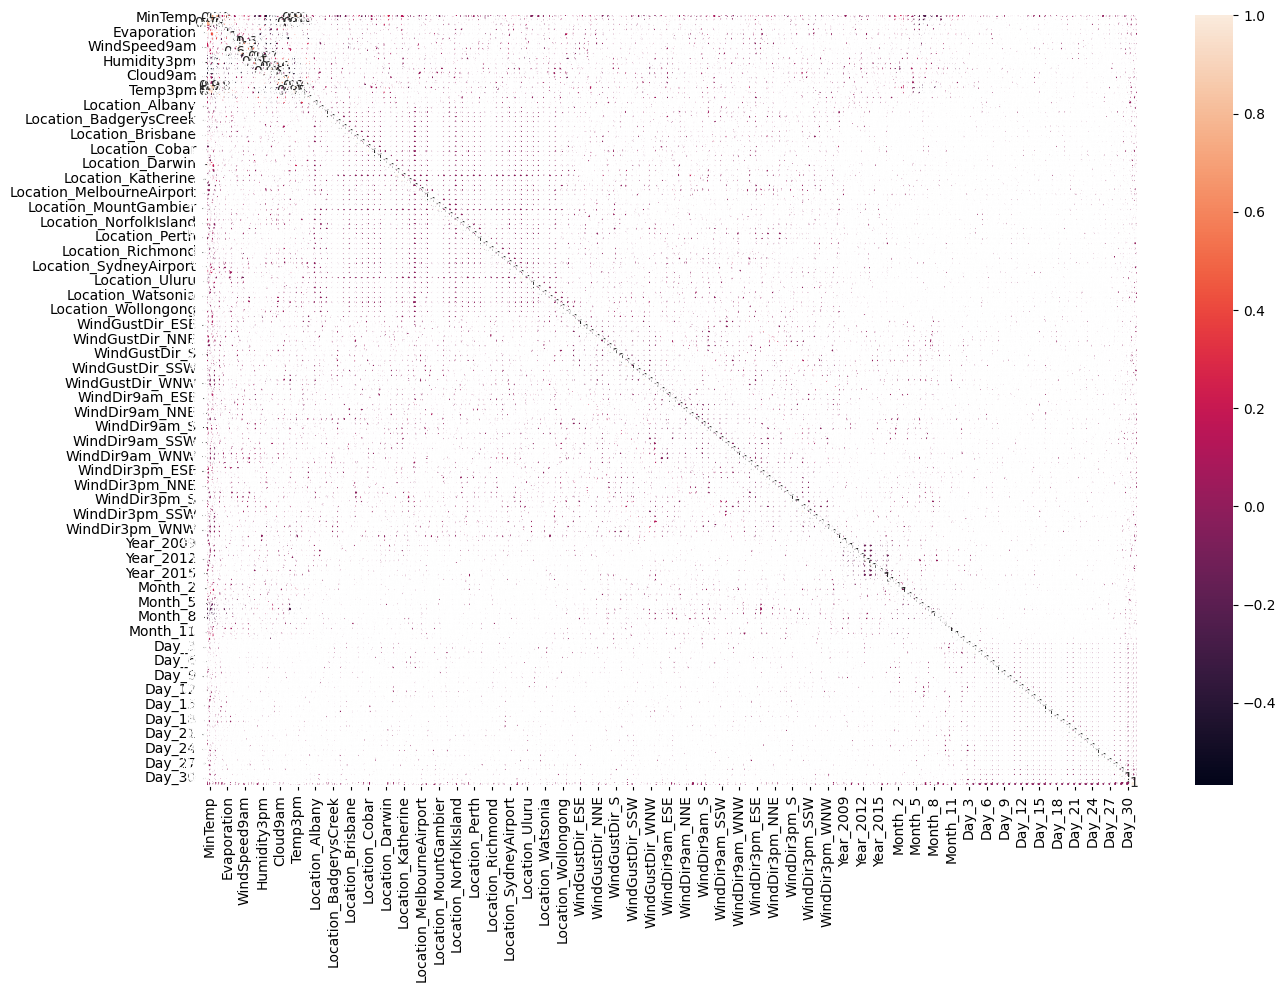

In [81]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)

In [ ]:
dummy_cols=["Location","WindGustDir","WindDir9am","WindDir3pm","Year", "Month", "Day"]

In [ ]:
for col in dummy_cols:
    dummies = pd.get_dummies(df[col],prefix=col,drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(col,axis=1)

In [ ]:
df.corr()

In [ ]:
sns.countplot(df["RainTomorrow"])

In [ ]:
X=df.drop("RainTommorow",axis=1)
y=df[["RainTommorow"]]